## No State Variables

In [1]:
#import yaml
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import sem
import sys
sys.path.append('/home/bchun/Ben-Code/Modeling-Codes/Codes/OpenMM_Migration/repo/OpenMM/pyscript')
import analysis_script as anas
from sklearn.linear_model import LinearRegression
from scipy import stats
%load_ext autoreload
%autoreload 2

['/home/bchun/Ben-Code/Modeling-Codes/Codes/OpenMM_Migration/repo/OpenMM/OpenBoxModel2', '/home/bchun/anaconda3/lib/python39.zip', '/home/bchun/anaconda3/lib/python3.9', '/home/bchun/anaconda3/lib/python3.9/lib-dynload', '', '/home/bchun/anaconda3/lib/python3.9/site-packages', '/home/bchun/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg', '/home/bchun/anaconda3/lib/python3.9/site-packages/IPython/extensions', '/home/bchun/.ipython', '/home/bchun/Ben-Code/Modeling-Codes/Codes/OpenMM_Migration/repo/OpenMM/pyscript']


In [4]:
data1 = anas.dataextractor3('test1.csv')
data2 = anas.dataextractor3('test2.csv')
data3 = anas.dataextractor3('test3.csv')
data4 = anas.dataextractor3('test4.csv')
data5 = anas.dataextractor3('test5.csv')
data6 = anas.dataextractor3('test6.csv')
data7 = anas.dataextractor3('test7.csv')
data8 = anas.dataextractor3('test8.csv')
data9 = anas.dataextractor3('test9.csv')
data10 = anas.dataextractor3('test10.csv')



avgmsd1 = anas.avgrmsd(data1)
avgmsd2 = anas.avgrmsd(data2)
avgmsd3 = anas.avgrmsd(data3)
avgmsd4 = anas.avgrmsd(data4)
avgmsd5 = anas.avgrmsd(data5)
avgmsd6 = anas.avgrmsd(data6)
avgmsd7 = anas.avgrmsd(data7)
avgmsd8 = anas.avgrmsd(data8)
avgmsd9 = anas.avgrmsd(data9)
avgmsd10 = anas.avgrmsd(data10)




In [5]:
avglow = (np.asarray(avgmsd1)+np.asarray(avgmsd3)+np.asarray(avgmsd5)+np.asarray(avgmsd7)+np.asarray(avgmsd9))/5*(10**2)
avgmid = (np.asarray(avgmsd2)+np.asarray(avgmsd4)+np.asarray(avgmsd6)+np.asarray(avgmsd8)+np.asarray(avgmsd10))/5*(10**2)


In [9]:
y1 = avglow[0:10000]
y2 = avgmid[0:10000]
timemodel = np.arange(len(list(data1.keys())))
x = timemodel[0:10000]


res1 = stats.linregress(x,y1)
print("R-squared: ", res1.rvalue**2)
print("Slope: ",res1.slope)
print("Intercept: ",res1.intercept)

res2 = stats.linregress(x,y2)
print("R-squared: ", res2.rvalue**2)
print("Slope: ",res2.slope)
print("Intercept: ",res2.intercept)



('R-squared: ', 3.6167604408843705e-06)
('Slope: ', 1.7804167462087628e-05)
('Intercept: ', 50.978084438899685)
('R-squared: ', 8.626430647670774e-07)
('Slope: ', -3.7154947118911074e-05)
('Intercept: ', 253.35980893092926)


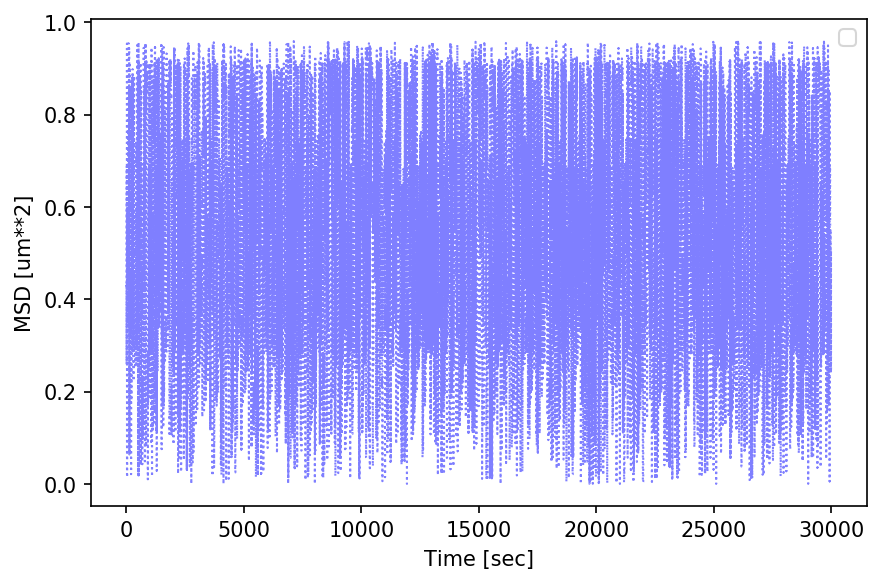

In [15]:
#time = np.arange(len(avglow))

plt.figure(figsize=(6,4),dpi=150)
plt.plot(timemodel,avgmsd5,'b:',alpha=0.5,lw=1)
#plt.plot(time,avgmsd2,'r:',alpha=0.5,lw=1)
#plt.plot(time,avgmsd3,'y:',alpha=0.5,lw=1)
#plt.plot(time,avgmsd4,'m:',alpha=0.5,lw=1)
#plt.plot(time,avgmsd5,'c:',alpha=0.5,lw=1)
#plt.plot(timemodel,avglow,'k:',alpha=0.5,lw=1.5,label='low')
#plt.plot(timemodel,avgmid,'r:',alpha=0.5,lw=1.5,label='mid')

#plt.plot(x,res1.intercept + res1.slope*x,'k',label=str('%.3f'%(res1.slope))+"x+"+str('%.3f'%(res1.intercept))+' D='+str(res1.slope/4))
#plt.plot(x,res2.intercept + res2.slope*x,'r',label=str('%.3f'%(res2.slope))+"x+"+str('%.3f'%(res2.intercept))+' D='+str(res2.slope/4))
plt.legend(loc=0)
plt.xlabel('Time [sec]')
plt.ylabel('MSD [um**2]')
plt.tight_layout()

In [2]:
import sys
sys.path.append('/home/bchun/.local/lib/python3.6/site-packages/')
sys.path.append('/home/bchun/Downloads/trackpy/')
sys.path.append('/usr/lib/python36.zip')
sys.path.append('/usr/lib/python3.6')
sys.path.append('/usr/lib/python3.6/lib-dynload')
sys.path.append('/home/bchun/.local/lib/python3.6/site-packages')
sys.path.append('/usr/local/lib/python3.6/dist-packages') 
sys.path.append('/usr/lib/python3/dist-packages')
sys.path.append('/home/bchun/.local/lib/python3.6/site-packages/IPython/extensions')
sys.path
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

In [3]:
path='/home/bchun/Ben-Code/Modeling-Codes/Codes/Migration_tiff/BV2_Ca5mM_ATP500uM_1/'
frames = pims.open(path+'A1_fld3.tiff')

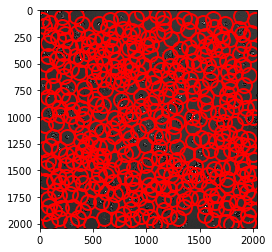

<AxesSubplot:>

In [4]:
f = tp.locate(frames[0], 51)
tp.annotate(f, frames[0])

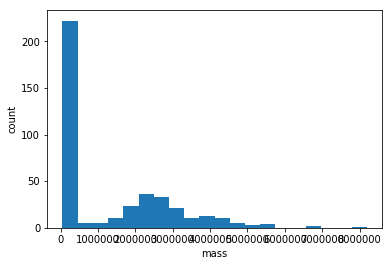

In [9]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

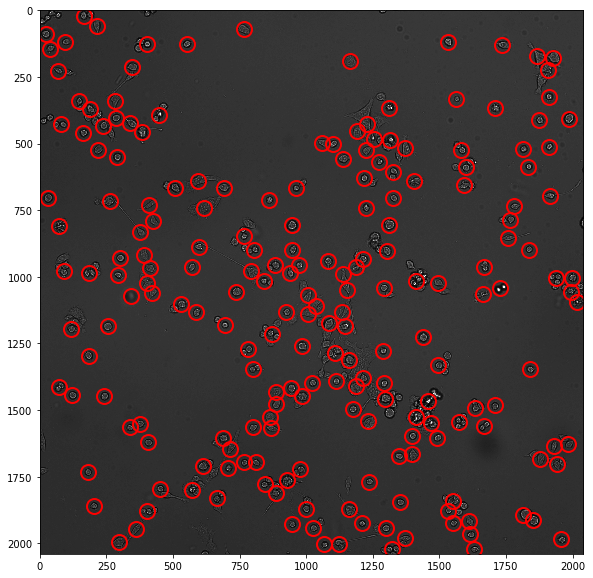

In [10]:
rcParams['figure.figsize']=10,10
f = tp.locate(frames[0], 39, minmass=1e6)
tp.annotate(f, frames[0])

Frame 192: 197 features


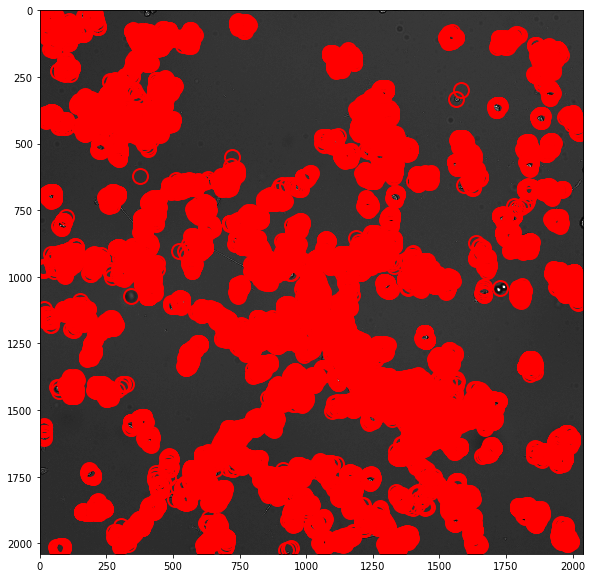

In [11]:
rcParams['figure.figsize']=10,10
f = tp.batch(frames, 39, minmass=1e6)
tp.annotate(f, frames[0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10f49aa898>,
      dtype=object)

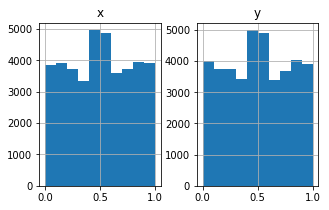

In [12]:
rcParams['figure.figsize']=5,3
tp.subpx_bias(f)

Frame 192: 197 trajectories present.


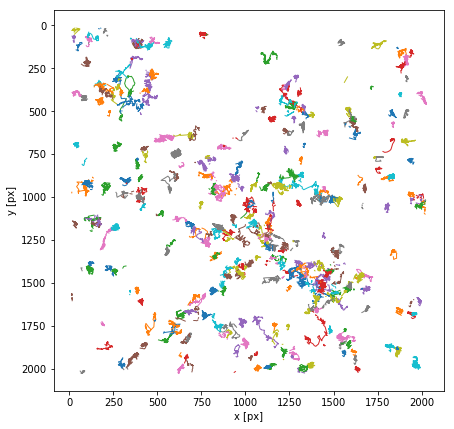

In [13]:
rcParams['figure.figsize']=7,7

maxDist=50 # maximum displacement in pixel
maxMissFrame=200 # do not forget disappeared particles unless they've disappeared for more than maxMissFrame

t = tp.link(f, maxDist, memory=maxMissFrame)

tp.plot_traj(t)

In [14]:
fs=t['frame'].values
ps=t['particle'].values
a=t['particle']
np.max(fs)

192

In [15]:
np.max(ps)

371

Before: 372
After: 299


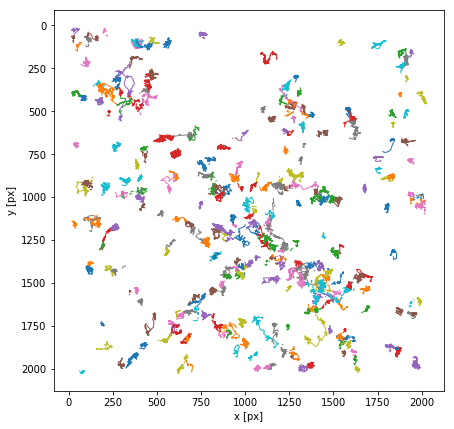

In [16]:
t1 = tp.filter_stubs(t, 50)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())
tp.plot_traj(t1)

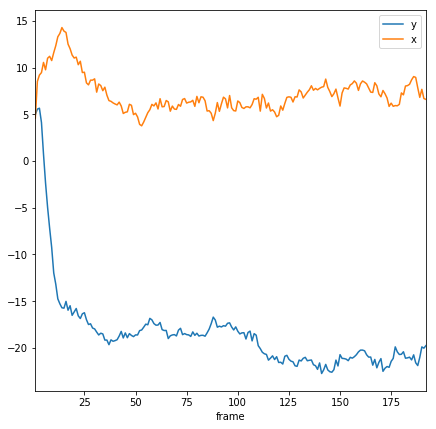

In [17]:
d = tp.compute_drift(t1)
d.plot()
plt.show()

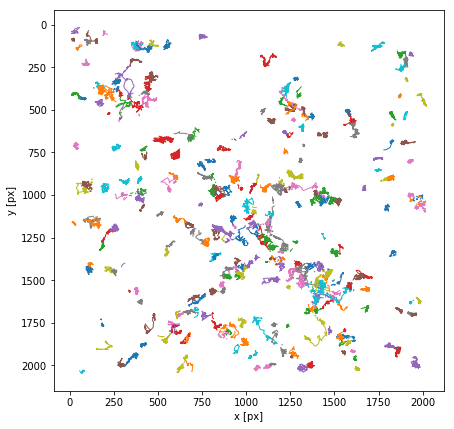

In [18]:
tm = tp.subtract_drift(t1.copy(), d)
ax = tp.plot_traj(tm)
plt.show()

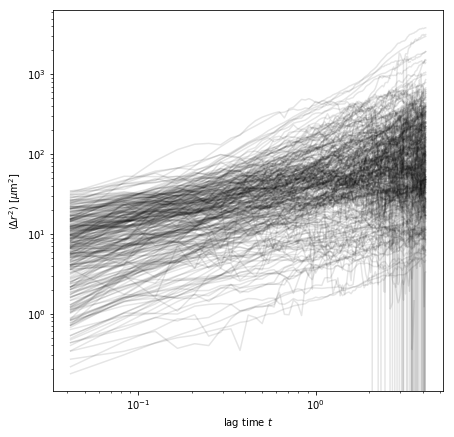

In [19]:
im = tp.imsd(tm, 100/285., 24)  # microns per pixel = 100/285., frames per second = 24

fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')

[Text(0, 0.5, '$\\langle \\Delta r^2 \\rangle$ [$\\mu$m$^2$]'),
 Text(0.5, 0, 'lag time $t$')]

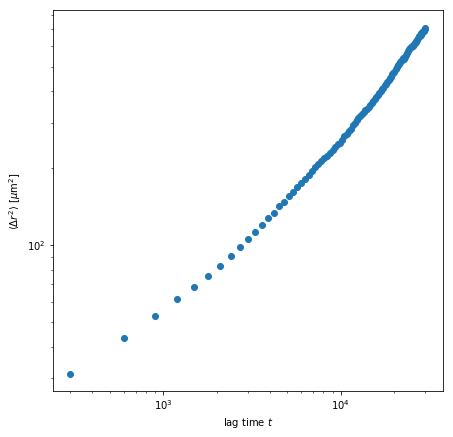

In [20]:
em = tp.emsd(tm, 0.65, 1/300) # microns per pixel = 100/285., frames per second = 24

fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
#ax.set(ylim=(1e-2, 10))

In [21]:
time = []
import numpy as np 
for i in em.index:
    time.append(i)

data = []
for i in em.values:
    data.append(i)

In [22]:
from scipy import stats
res1expt = stats.linregress(time,data)
print(f"R-squared: {res1expt.rvalue**2:.6f}")
print("Slope: ",res1expt.slope)
print("Intercept: ",res1expt.intercept)

R-squared: 0.999230
Slope:  0.022320586488622757
Intercept:  34.43184292825731


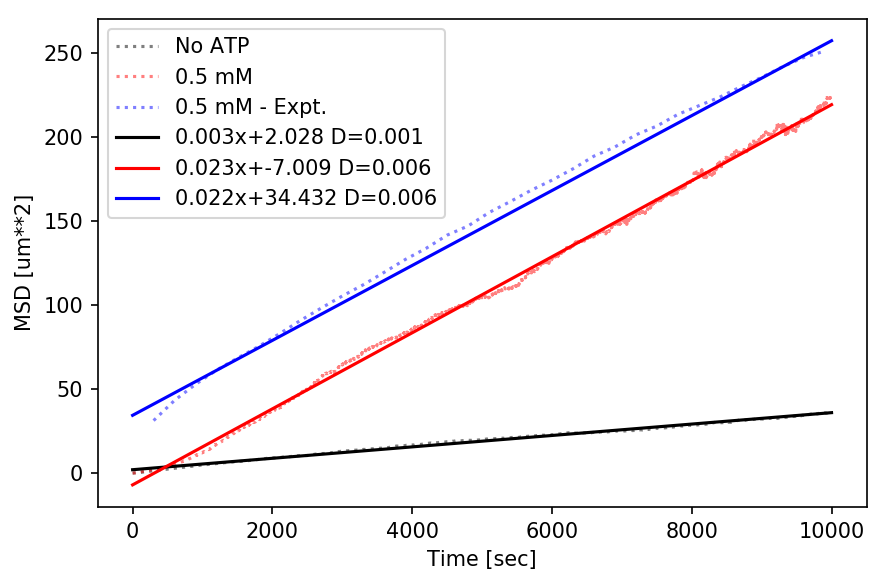

In [35]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(timemodel[0:10000],avglow[0:10000],'k:',alpha=0.5,lw=1.5,label='No ATP')
plt.plot(timemodel[0:10000],avgmid[0:10000],'r:',alpha=0.5,lw=1.5,label='0.5 mM')
plt.plot(time[0:33],data[0:33],'b:',alpha=0.5,label='0.5 mM - Expt.')

plt.plot(x,res1.intercept + res1.slope*x,'k',label=str('%.3f'%(res1.slope))+"x+"+str('%.3f'%(res1.intercept))+' D='+str('%.3f'%(res1.slope/4)))
plt.plot(x,res2.intercept + res2.slope*x,'r',label=str('%.3f'%(res2.slope))+"x+"+str('%.3f'%(res2.intercept))+' D='+str('%.3f'%(res2.slope/4)))
plt.plot(x,res1expt.intercept + res1expt.slope*x,'b',label=str('%.3f'%(res1expt.slope))+"x+"+str('%.3f'%(res1expt.intercept))+' D='+str('%.3f'%(res1expt.slope/4)))

plt.legend(loc=0)
plt.xlabel('Time [sec]')
plt.ylabel('MSD [um**2]')
plt.tight_layout()

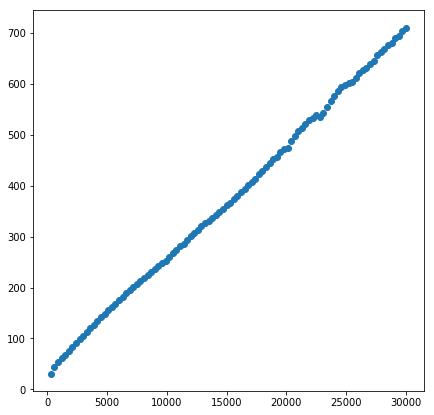

In [40]:
plt.plot(time,data,'o')


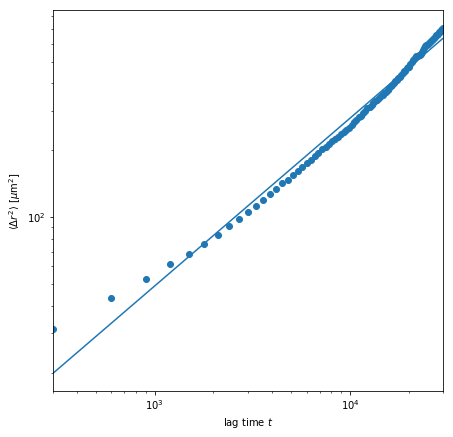

,n,A
msd,0.754322,0.267401


In [38]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');
tp.utils.fit_powerlaw(em)  # performs linear best fit in log space, plots]


In [3]:
data1 = anas.dataextractor3('test1.csv')
data2 = anas.dataextractor3('test4.csv')
data3 = anas.dataextractor3('test7.csv')
data4 = anas.dataextractor3('test10.csv')
data5 = anas.dataextractor3('test13.csv')

avgrmsd1 = anas.avgrmsd(data1)
avgrmsd2 = anas.avgrmsd(data2)
avgrmsd3 = anas.avgrmsd(data3)
avgrmsd4 = anas.avgrmsd(data4)
avgrmsd5 = anas.avgrmsd(data5)

data1 = anas.dataextractor3('test2.csv')
data2 = anas.dataextractor3('test5.csv')
data3 = anas.dataextractor3('test8.csv')
data4 = anas.dataextractor3('test11.csv')
data5 = anas.dataextractor3('test14.csv')

avgrmsd6 = anas.avgrmsd(data1)
avgrmsd7 = anas.avgrmsd(data2)
avgrmsd8 = anas.avgrmsd(data3)
avgrmsd9 = anas.avgrmsd(data4)
avgrmsd10 = anas.avgrmsd(data5)

data1 = anas.dataextractor3('test3.csv')
data2 = anas.dataextractor3('test6.csv')
data3 = anas.dataextractor3('test9.csv')
data4 = anas.dataextractor3('test12.csv')
data5 = anas.dataextractor3('test15.csv')

avgrmsd11 = anas.avgrmsd(data1)
avgrmsd12 = anas.avgrmsd(data2)
avgrmsd13 = anas.avgrmsd(data3)
avgrmsd14 = anas.avgrmsd(data4)
avgrmsd15 = anas.avgrmsd(data5)

ZeroDivisionError: division by zero

In [ ]:
avgall1 = (np.asarray(avgrmsd1)+np.asarray(avgrmsd2)+np.asarray(avgrmsd3)+np.asarray(avgrmsd4)+np.asarray(avgrmsd5))/5
avgall2 = (np.asarray(avgrmsd6)+np.asarray(avgrmsd7)+np.asarray(avgrmsd8)+np.asarray(avgrmsd9)+np.asarray(avgrmsd10))/5
avgall3 = (np.asarray(avgrmsd11)+np.asarray(avgrmsd12)+np.asarray(avgrmsd13)+np.asarray(avgrmsd14)+np.asarray(avgrmsd15))/5


y1 = avgall1[25:200]
y2 = avgall2[25:200]
y3 = avgall3[25:200]
time = np.arange(len(list(data1.keys())))*10
x = time[25:200]


res1 = stats.linregress(x,y1)
print(f"R-squared: {res1.rvalue**2:.6f}")
print("Slope: ",res1.slope)
print("Intercept: ",res1.intercept)

res2 = stats.linregress(x,y2)
print(f"R-squared: {res2.rvalue**2:.6f}")
print("Slope: ",res2.slope)
print("Intercept: ",res2.intercept)

res3 = stats.linregress(x,y3)
print(f"R-squared: {res3.rvalue**2:.6f}")
print("Slope: ",res3.slope)
print("Intercept: ",res3.intercept)

plt.figure(figsize=(6,4),dpi=150)
#plt.plot(time,avgrmsd1,'b:',alpha=0.5,lw=1)
#plt.plot(time,avgrmsd2,'r:',alpha=0.5,lw=1)
#plt.plot(time,avgrmsd3,'y:',alpha=0.5,lw=1)
#plt.plot(time,avgrmsd4,'m:',alpha=0.5,lw=1)
#plt.plot(time,avgrmsd5,'c:',alpha=0.5,lw=1)
plt.plot(time,avgall1,'g:',alpha=0.5,lw=1.5,label='Num of DC = 10')
plt.plot(time,avgall2,'b:',alpha=0.5,lw=1.5,label='Num of DC = 20')
plt.plot(time,avgall3,'k:',alpha=0.5,lw=1.5,label='Num of DC = 30')

plt.plot(x,res1.intercept + res1.slope*x,'g',label=str('%.3f'%(res1.slope))+"x+"+str('%.3f'%(res1.intercept)))
plt.plot(x,res2.intercept + res2.slope*x,'b',label=str('%.3f'%(res2.slope))+"x+"+str('%.3f'%(res2.intercept)))
plt.plot(x,res3.intercept + res3.slope*x,'k',label=str('%.3f'%(res3.slope))+"x+"+str('%.3f'%(res3.intercept)))

plt.legend(loc=0)

plt.xlabel('Steps (x100)')
plt.ylabel('MSD')
plt.tight_layout()